Importando bibliotecas

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

from sklearn.cluster import DBSCAN 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AGNES

from sklearn import metrics


Importando a base de dados

In [2]:
#Importa a base
df = pd.read_csv("Base2.csv")
df.head

<bound method NDFrame.head of              x         y  label
0     8.550574  7.811962      2
1     0.604058  4.815470      0
2     5.680705  9.342971      2
3    -0.940972  5.686262      0
4     8.687082  6.941548      2
...        ...       ...    ...
1995 -2.591342 -1.729386      1
1996  8.197490  7.644839      2
1997  0.438963  4.228444      0
1998  1.741641  5.177281      0
1999 -9.637148 -5.152756      3

[2000 rows x 3 columns]>

Exibe o gráfico das intâncias da base

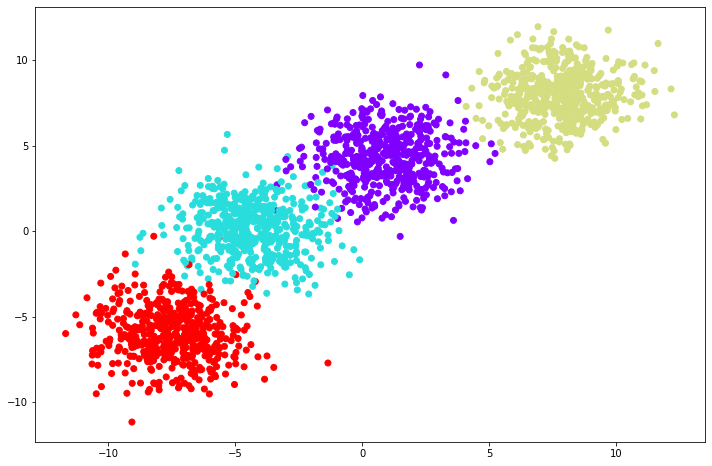

In [30]:
#df_temp não possui a coluna da classe(label)
df_temp = pd.DataFrame(df,columns=df.columns[:-1])
x = pd.DataFrame(df,columns=df.columns[:1])
y = pd.DataFrame(df,columns=df.columns[1:2])
plt.figure(figsize=(12,8))
#tranforma a coluna label em um array
aux = pd.DataFrame(df,columns=df.columns[2:3])
aux = aux.to_numpy()
labels = []
for i in range(2000):
    labels.append(aux[i][0])

plt.scatter(x,y,c=labels,cmap="rainbow")

Encontrando os melhores parâmetros e exibindo o score

DBSCAN

In [4]:
accuracy_dbscan = []
param = []

for i in range(10):
    for j in range(10):
        dbscan = DBSCAN(eps=((i+1)/10),min_samples=j+1)
        dbscan.fit(df_temp)
        accuracy_dbscan.append(metrics.rand_score(labels,dbscan.labels_))
        param.append([((i+1)/10),j+1]) #salva os melhores parâmetros

print("Acurácias:")
print(*accuracy_dbscan,sep=' | ')
best_dbscan = np.argmax(accuracy_dbscan)
print("Melhor acurácia = ",accuracy_dbscan[best_dbscan])

#salva os melhores parâmetros
raio = param[best_dbscan][0] 
pontos = param[best_dbscan][1] 

Acurácias:
0.7507218609304652 | 0.5562831415707854 | 0.4139549774887444 | 0.31658629314657327 | 0.26211855927963984 | 0.2496248124062031 | 0.2496248124062031 | 0.2496248124062031 | 0.2496248124062031 | 0.2496248124062031 | 0.7616043021510756 | 0.7340380190095047 | 0.7072516258129065 | 0.6538934467233617 | 0.5791865932966483 | 0.4883136568284142 | 0.4112286143071536 | 0.3405287643821911 | 0.29396598299149573 | 0.2546773386693347 | 0.8826348174087043 | 0.8784282141070535 | 0.8735797898949474 | 0.8475882941470735 | 0.8096893446723362 | 0.7606378189094547 | 0.7202921460730365 | 0.664711855927964 | 0.6217848924462231 | 0.5821195597798899 | 0.9355202601300651 | 0.9343466733366683 | 0.9334532266133067 | 0.9182306153076538 | 0.9048614307153576 | 0.8912781390695348 | 0.8669829914957479 | 0.8416178089044523 | 0.8131205602801401 | 0.7840775387693847 | 0.6315162581290645 | 0.6311315657828914 | 0.6306023011505753 | 0.8509854927463731 | 0.8465452726363182 | 0.9401650825412706 | 0.9254797398699349 | 

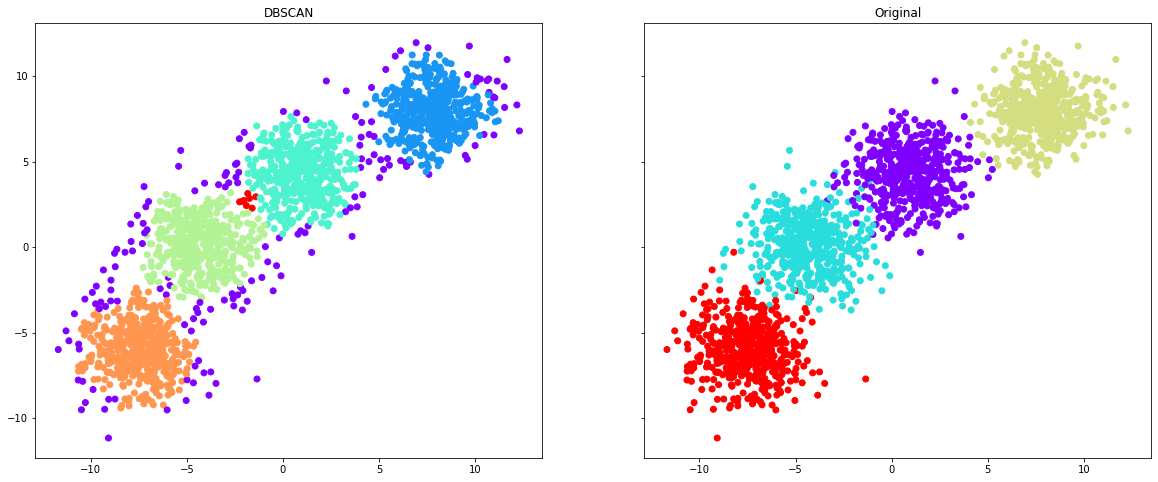

In [5]:
#Faz o fit com os melhores parâmetros
dbscan = DBSCAN(eps=raio,min_samples=pontos)
dbscan.fit(df_temp)

#Plota o gráfico
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(20,8))
ax1.set_title("DBSCAN")
ax1.scatter(x,y,c=dbscan.labels_,cmap="rainbow")
ax2.set_title("Original")
ax2.scatter(x,y,c=labels,cmap="rainbow")

In [6]:
print("Acurácia DBSCAN = ",metrics.rand_score(labels,dbscan.labels_))

Acurácia DBSCAN =  0.9490690345172587


K-Means

In [7]:
accuracy_kmeans = []
for i in range(20):
    kmeans = KMeans(n_clusters=i+1)
    kmeans.fit(df_temp)
    accuracy_kmeans.append(metrics.rand_score(labels,kmeans.labels_))

best_kmeans = np.argmax(accuracy_kmeans)
print("Acurácias")
print(*accuracy_kmeans,sep=' | ')
print("Melhor Acurácia = ",accuracy_kmeans[best_kmeans])

Acurácias
0.2496248124062031 | 0.7405507753876939 | 0.8465017508754377 | 0.9881385692846423 | 0.9561065532766383 | 0.9234262131065533 | 0.8969309654827413 | 0.8657078539269635 | 0.8551975987993997 | 0.8461530765382691 | 0.8350005002501251 | 0.828751375687844 | 0.8242196098049025 | 0.820959979989995 | 0.8159794897448724 | 0.8108909454727363 | 0.8070440220110056 | 0.8044732366183092 | 0.8019909954977489 | 0.8001825912956478
Melhor Acurácia =  0.9881385692846423


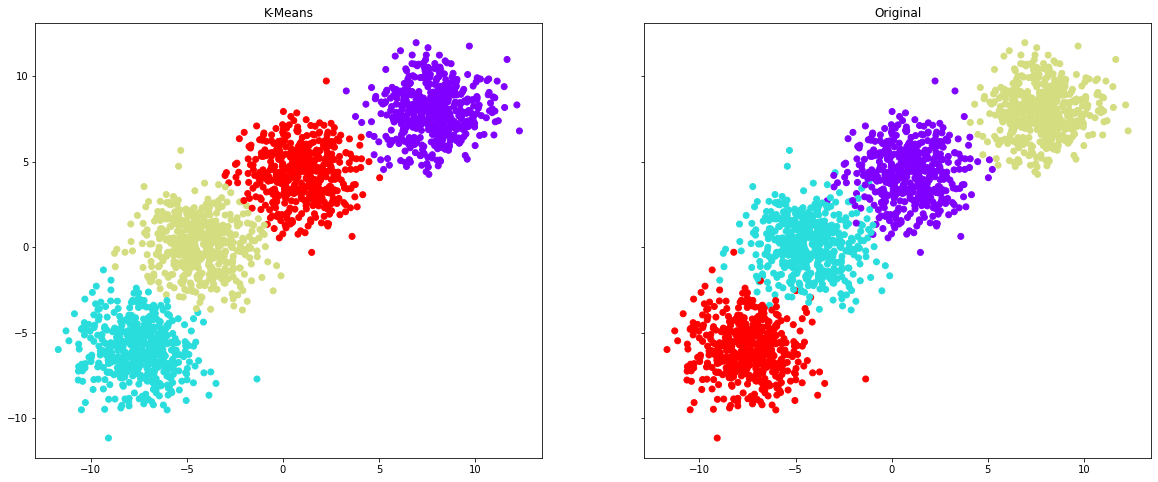

In [8]:
#Faz o fit com o melhor parâmetro
kmeans = KMeans(n_clusters=best_kmeans+1)
kmeans.fit(df_temp)

#Plota o gráfico
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(20,8))
ax1.set_title("K-Means")
ax1.scatter(x,y,c=kmeans.labels_,cmap="rainbow")
ax2.set_title("Original")
ax2.scatter(x,y,c=labels,cmap="rainbow")

In [9]:
print("Acurácia K-Means = ",metrics.rand_score(labels,kmeans.labels_))

Acurácia K-Means =  0.9881385692846423


AGNES

In [10]:
#AGNES Single Link (Min)
accuracy_min = []
for i in range(20):
    agnes = AGNES(n_clusters=i+1,linkage="single")
    agnes.fit(df_temp)
    accuracy_min.append(metrics.rand_score(labels,agnes.labels_))

best_min = np.argmax(accuracy_min)
print("Acurácias AGNES Single Linkage")
print(*accuracy_min,sep=' | ')
print("Melhor Acurácia = ",accuracy_min[best_min])


Acurácias AGNES Single Linkage
0.2496248124062031 | 0.2501255627813907 | 0.25062681340670334 | 0.2516273136568284 | 0.25212606303151575 | 0.25262431215607806 | 0.25312306153076536 | 0.2541205602801401 | 0.25461880940470233 | 0.2551175587793897 | 0.25511705852926464 | 0.2556143071535768 | 0.2556138069034517 | 0.25611155577788897 | 0.2566088044022011 | 0.25760130065032516 | 0.2580980490245123 | 0.25909154577288646 | 0.25958779389694847 | 0.2600845422711356
Melhor Acurácia =  0.2600845422711356


In [11]:
#AGNES Complete Linkage (Max)
accuracy_max = []
for i in range(20):
    agnes = AGNES(n_clusters=i+1,linkage="complete")
    agnes.fit(df_temp)
    accuracy_max.append(metrics.rand_score(labels,agnes.labels_))

best_max = np.argmax(accuracy_max)
print("Acurácias AGNES Complete Linkage")
print(*accuracy_max,sep=' | ')
print("Melhor Acurácia = ",accuracy_max[best_max])

Acurácias AGNES Complete Linkage
0.2496248124062031 | 0.7395902951475738 | 0.8604807403701851 | 0.9798284142071035 | 0.9605657828914457 | 0.936576288144072 | 0.9098519259629815 | 0.8950325162581291 | 0.8765957978989495 | 0.8627168584292146 | 0.8447608804402201 | 0.8407108554277138 | 0.8302926463231616 | 0.8287528764382192 | 0.8276408204102051 | 0.8273056528264132 | 0.8259729864932466 | 0.816591795897949 | 0.8156013006503252 | 0.812120060030015
Melhor Acurácia =  0.9798284142071035


In [12]:
#AGNES Centroides (Ward)
accuracy_ward = []
for i in range(20):
    agnes = AGNES(n_clusters=i+1,linkage="ward")
    agnes.fit(df_temp)
    accuracy_ward.append(metrics.rand_score(labels,agnes.labels_))

best_ward = np.argmax(accuracy_ward)
print("Acurácias AGNES Centroides")
print(*accuracy_ward,sep=' | ')
print("Melhor Acurácia = ",accuracy_ward[best_ward])

Acurácias AGNES Centroides
0.2496248124062031 | 0.6178494247123562 | 0.8602986493246624 | 0.9746368184092046 | 0.9481260630315158 | 0.9186473236618309 | 0.9046843421710855 | 0.8746543271635818 | 0.8562811405702851 | 0.8491405702851426 | 0.8424337168584292 | 0.8363806903451726 | 0.8298974487243622 | 0.8232821410705353 | 0.8160140070035018 | 0.8117053526763381 | 0.8069644822411206 | 0.8043731865932966 | 0.8038834417208605 | 0.803063531765883
Melhor Acurácia =  0.9746368184092046


In [13]:
#Decide qual medida de singularidade obteve os melhores resultados e salva os parâmetros
param = []
if (accuracy_min[best_min] >= accuracy_max[best_max] and accuracy_min[best_min] >= accuracy_ward[best_ward]):
    param.append(best_min+1)
    param.append("single")
elif (accuracy_max[best_max] >= accuracy_min[best_min] and accuracy_max[best_max] >= accuracy_ward[best_ward]):
    param.append(best_max+1)
    param.append("complete")
elif (accuracy_ward[best_ward] >= accuracy_min[best_min] and accuracy_ward[best_ward] >= accuracy_max[best_max]):
    param.append(best_ward+1)
    param.append("ward")

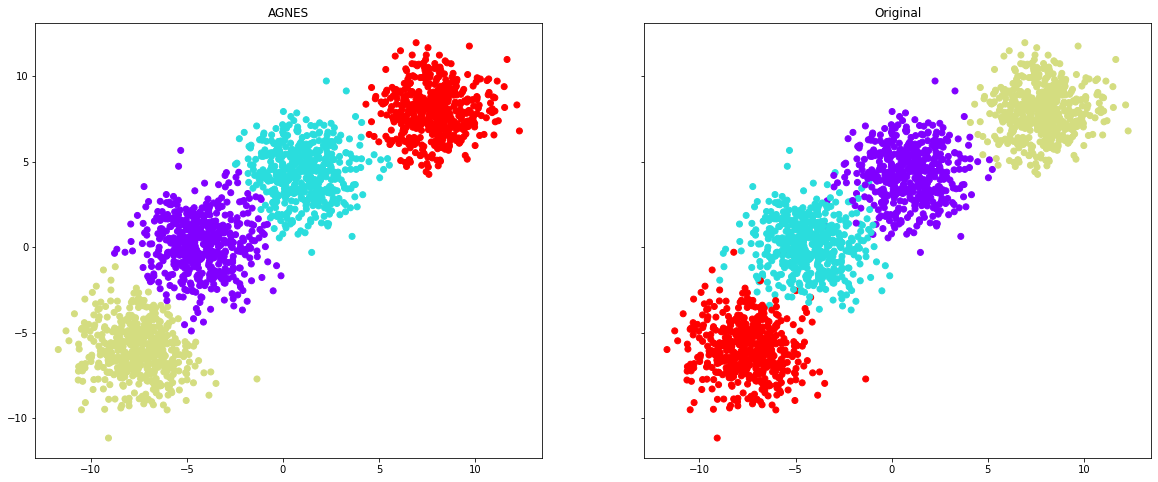

In [14]:
#Faz o fit com o melhor parâmetro
agnes = AGNES(n_clusters=param[0],linkage=param[1])
agnes.fit(df_temp)

#Plota o gráfico
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(20,8))
ax1.set_title("AGNES")
ax1.scatter(x,y,c=agnes.labels_,cmap="rainbow")
ax2.set_title("Original")
ax2.scatter(x,y,c=labels,cmap="rainbow")

In [15]:
print("Acurácia AGNES",param[1],"= ",metrics.rand_score(labels,agnes.labels_))

Acurácia AGNES complete =  0.9798284142071035


Avaliação dos Agrupamentos

DBSCAN

In [72]:
#DBSCAN

#Monta um dataframe para cada tecnica de agrupamento, relacionando cada ponto com um cluster e calcula os centróides
data = {
    'x':[*x],
    'y':[*y],
    'cluster':[*dbscan.labels_]
}
df_dbscan = pd.DataFrame(data)
df_dbscan

,x,y,cluster
0,8.550574,7.811962,0
1,0.604058,4.815470,1
2,5.680705,9.342971,0
3,-0.940972,5.686262,1
4,8.687082,6.941548,0
...,...,...,...
1995,-2.591342,-1.729386,2
1996,8.197490,7.644839,0
1997,0.438963,4.228444,1
1998,1.741641,5.177281,1


In [97]:
#Separa os pontos de cada cluster e calcula os centroides
x_c0 = []; y_c0 = []
x_c1 = []; y_c1 = []
x_c2 = []; y_c2 = []
x_c3 = []; y_c3 = []
for i in range(2000):
    if dbscan.labels_[i] == 0:
        x_c0.append(x[i])
        y_c0.append(y[i])
    elif dbscan.labels_[i] == 1:
        x_c1.append(x[i])
        y_c1.append(y[i])
    elif dbscan.labels_[i] == 2:
        x_c2.append(x[i])
        y_c2.append(y[i])   
    elif dbscan.labels_[i] == 3:
        x_c3.append(x[i])
        y_c3.append(y[i])

#cluster, x, y
centroids_dbscan = [ ['0',statistics.mean(x_c0),statistics.mean(y_c0)], ['1',statistics.mean(x_c1),statistics.mean(y_c1)], ['2',statistics.mean(x_c2),statistics.mean(y_c2)], ['3',statistics.mean(x_c3),statistics.mean(y_c3)]]
print("Centróides de cada cluster DBSCAN: [<cluster>,<x>,<y>]")
print(centroids_dbscan)

Centróides de cada cluster DBSCAN: [<cluster>,<x>,<y>]
[['0', 7.784919426060898, 7.91773974650182], ['1', 0.9386895500742337, 4.325417972300017], ['2', -4.301222939105343, 0.17066730025475405], ['3', -7.501776810675917, -6.037688304396618]]


Coesão DBSCAN

In [94]:
coesao_c0 = 0.0
coesao_c1 = 0.0
coesao_c2 = 0.0
coesao_c3 = 0.0

for i in range(len(x_c0)):
    coesao_c0 += np.sqrt((x_c0[i] - centroids_dbscan[0][1])**2 + (y_c0[i] - centroids_dbscan[0][2])**2)
coesao_c0 /= len(x_c0)

for i in range(len(x_c1)):
    coesao_c1 += np.sqrt((x_c1[i] - centroids_dbscan[1][1])**2 + (y_c1[i] - centroids_dbscan[1][2])**2)
coesao_c1 /= len(x_c1)

for i in range(len(x_c2)):
    coesao_c2 += np.sqrt((x_c2[i] - centroids_dbscan[2][1])**2 + (y_c2[i] - centroids_dbscan[2][2])**2)
coesao_c2 /= len(x_c2)

for i in range(len(x_c3)):
    coesao_c3 += np.sqrt((x_c3[i] - centroids_dbscan[3][1])**2 + (y_c3[i] - centroids_dbscan[3][2])**2)
coesao_c3 /= len(x_c3)

print("Coesão DBSCAN ")
print("Coesão cluster 0 =",coesao_c0)
print("Coesão cluster 1 =",coesao_c1)
print("Coesão cluster 2 =",coesao_c2)
print("Coesão cluster 3 =",coesao_c3)

Coesão DBSCAN 
Coesão cluster 0 = 1.6621517296200634
Coesão cluster 1 = 1.721171320506263
Coesão cluster 2 = 1.6883158433032899
Coesão cluster 3 = 1.6935696962694566


Separabilidade DBSCAN

In [113]:
#calcula a distancia entre todos os centroides dos 4 clusters 
d_c0_c1 = np.sqrt((centroids_dbscan[0][1] - centroids_dbscan[1][1])**2 + (centroids_dbscan[0][2] - centroids_dbscan[1][2])**2)
d_c0_c2 = np.sqrt((centroids_dbscan[0][1] - centroids_dbscan[2][1])**2 + (centroids_dbscan[0][2] - centroids_dbscan[2][2])**2)
d_c0_c3 = np.sqrt((centroids_dbscan[0][1] - centroids_dbscan[3][1])**2 + (centroids_dbscan[0][2] - centroids_dbscan[3][2])**2)

d_c1_c2 = np.sqrt((centroids_dbscan[1][1] - centroids_dbscan[2][1])**2 + (centroids_dbscan[1][2] - centroids_dbscan[2][2])**2)
d_c1_c3 = np.sqrt((centroids_dbscan[1][1] - centroids_dbscan[3][1])**2 + (centroids_dbscan[1][2] - centroids_dbscan[3][2])**2)

d_c2_c3 = np.sqrt((centroids_dbscan[2][1] - centroids_dbscan[3][1])**2 + (centroids_dbscan[2][2] - centroids_dbscan[3][2])**2)

sep_c0 = (d_c0_c1 + d_c0_c2 + d_c0_c3)/3
sep_c1 = (d_c0_c1 + d_c1_c2 + d_c1_c3)/3
sep_c2 = (d_c0_c2 + d_c1_c2 + d_c2_c3)/3
sep_c3 = (d_c0_c3 + d_c1_c3 + d_c2_c3)/3

print("Separabilidade DBSCAN")
print("Separabilidade cluster 0 = ",sep_c0)
print("Separabilidade cluster 1 = ",sep_c1)
print("Separabilidade cluster 2 = ",sep_c2)
print("Separabilidade cluster 3 = ",sep_c3)

Separabilidade DBSCAN
Separabilidade cluster 0 =  14.262031797955649
Separabilidade cluster 1 =  9.261375747684406
Separabilidade cluster 2 =  9.342629415018395
Separabilidade cluster 3 =  13.682987799909313


K-Means

In [99]:
#K-Means
data = {
    'x':[*x],
    'y':[*y],
    'cluster':[*kmeans.labels_]
}
df_kmeans = pd.DataFrame(data)
df_kmeans


,x,y,cluster
0,8.550574,7.811962,0
1,0.604058,4.815470,3
2,5.680705,9.342971,0
3,-0.940972,5.686262,3
4,8.687082,6.941548,0
...,...,...,...
1995,-2.591342,-1.729386,2
1996,8.197490,7.644839,0
1997,0.438963,4.228444,3
1998,1.741641,5.177281,3


In [100]:
#Separa os pontos de cada cluster e calcula os centroides
x_c0 = []; y_c0 = []
x_c1 = []; y_c1 = []
x_c2 = []; y_c2 = []
x_c3 = []; y_c3 = []
for i in range(2000):
    if kmeans.labels_[i] == 0:
        x_c0.append(x[i])
        y_c0.append(y[i])
    elif kmeans.labels_[i] == 1:
        x_c1.append(x[i])
        y_c1.append(y[i])
    elif kmeans.labels_[i] == 2:
        x_c2.append(x[i])
        y_c2.append(y[i])   
    elif kmeans.labels_[i] == 3:
        x_c3.append(x[i])
        y_c3.append(y[i])

#cluster, x, y
centroids_kmeans = [ ['0',statistics.mean(x_c0),statistics.mean(y_c0)], ['1',statistics.mean(x_c1),statistics.mean(y_c1)], ['2',statistics.mean(x_c2),statistics.mean(y_c2)], ['3',statistics.mean(x_c3),statistics.mean(y_c3)]]
print("Centróides de cada cluster K-Means: [<cluster>,<x>,<y>]")
print(centroids_kmeans)


Centróides de cada cluster K-Means: [<cluster>,<x>,<y>]
[['0', 7.809995918783511, 7.920139261755824], ['1', -7.528838083222765, -6.029316585373681], ['2', -4.319650627822059, 0.13324655148666326], ['3', 0.900671890612415, 4.299971354885388]]


Coesão K-Means

In [102]:
coesao_c0 = 0.0
coesao_c1 = 0.0
coesao_c2 = 0.0
coesao_c3 = 0.0

for i in range(len(x_c0)):
    coesao_c0 += np.sqrt((x_c0[i] - centroids_kmeans[0][1])**2 + (y_c0[i] - centroids_kmeans[0][2])**2)
coesao_c0 /= len(x_c0)

for i in range(len(x_c1)):
    coesao_c1 += np.sqrt((x_c1[i] - centroids_kmeans[1][1])**2 + (y_c1[i] - centroids_kmeans[1][2])**2)
coesao_c1 /= len(x_c1)

for i in range(len(x_c2)):
    coesao_c2 += np.sqrt((x_c2[i] - centroids_kmeans[2][1])**2 + (y_c2[i] - centroids_kmeans[2][2])**2)
coesao_c2 /= len(x_c2)

for i in range(len(x_c3)):
    coesao_c3 += np.sqrt((x_c3[i] - centroids_kmeans[3][1])**2 + (y_c3[i] - centroids_kmeans[3][2])**2)
coesao_c3 /= len(x_c3)

print("Coesão K-Means ")
print("Coesão cluster 0 =",coesao_c0)
print("Coesão cluster 1 =",coesao_c1)
print("Coesão cluster 2 =",coesao_c2)
print("Coesão cluster 3 =",coesao_c3)

Coesão K-Means 
Coesão cluster 0 = 1.8315960448417747
Coesão cluster 1 = 1.8734725871077906
Coesão cluster 2 = 1.876158114622533
Coesão cluster 3 = 1.8675520278223228


Separabilidade K-Means

In [114]:
#calcula a distancia entre todos os centroides dos 4 clusters 
d_c0_c1 = np.sqrt((centroids_kmeans[0][1] - centroids_kmeans[1][1])**2 + (centroids_kmeans[0][2] - centroids_kmeans[1][2])**2)
d_c0_c2 = np.sqrt((centroids_kmeans[0][1] - centroids_kmeans[2][1])**2 + (centroids_kmeans[0][2] - centroids_kmeans[2][2])**2)
d_c0_c3 = np.sqrt((centroids_kmeans[0][1] - centroids_kmeans[3][1])**2 + (centroids_kmeans[0][2] - centroids_kmeans[3][2])**2)

d_c1_c2 = np.sqrt((centroids_kmeans[1][1] - centroids_kmeans[2][1])**2 + (centroids_kmeans[1][2] - centroids_kmeans[2][2])**2)
d_c1_c3 = np.sqrt((centroids_kmeans[1][1] - centroids_kmeans[3][1])**2 + (centroids_kmeans[1][2] - centroids_kmeans[3][2])**2)

d_c2_c3 = np.sqrt((centroids_kmeans[2][1] - centroids_kmeans[3][1])**2 + (centroids_kmeans[2][2] - centroids_kmeans[3][2])**2)

sep_c0 = (d_c0_c1 + d_c0_c2 + d_c0_c3)/3
sep_c1 = (d_c0_c1 + d_c1_c2 + d_c1_c3)/3
sep_c2 = (d_c0_c2 + d_c1_c2 + d_c2_c3)/3
sep_c3 = (d_c0_c3 + d_c1_c3 + d_c2_c3)/3

print("Separabilidade K-Means")
print("Separabilidade cluster 0 = ",sep_c0)
print("Separabilidade cluster 1 = ",sep_c1)
print("Separabilidade cluster 2 = ",sep_c2)
print("Separabilidade cluster 3 = ",sep_c3)

Separabilidade K-Means
Separabilidade cluster 0 =  14.315846630597257
Separabilidade cluster 1 =  13.671219533282283
Separabilidade cluster 2 =  9.347147829256143
Separabilidade cluster 3 =  9.270642196288884


AGNES

In [105]:
#AGNES
data = {
    'x':[*x],
    'y':[*y],
    'cluster':[*agnes.labels_]
}
df_agnes = pd.DataFrame(data) 
df_agnes

,x,y,cluster
0,8.550574,7.811962,3
1,0.604058,4.815470,1
2,5.680705,9.342971,3
3,-0.940972,5.686262,1
4,8.687082,6.941548,3
...,...,...,...
1995,-2.591342,-1.729386,0
1996,8.197490,7.644839,3
1997,0.438963,4.228444,1
1998,1.741641,5.177281,1


In [106]:
#Separa os pontos de cada cluster e calcula os centroides
x_c0 = []; y_c0 = []
x_c1 = []; y_c1 = []
x_c2 = []; y_c2 = []
x_c3 = []; y_c3 = []
for i in range(2000):
    if agnes.labels_[i] == 0:
        x_c0.append(x[i])
        y_c0.append(y[i])
    elif agnes.labels_[i] == 1:
        x_c1.append(x[i])
        y_c1.append(y[i])
    elif agnes.labels_[i] == 2:
        x_c2.append(x[i])
        y_c2.append(y[i])   
    elif agnes.labels_[i] == 3:
        x_c3.append(x[i])
        y_c3.append(y[i])

centroids_agnes = [ ['0',statistics.mean(x_c0),statistics.mean(y_c0)], ['1',statistics.mean(x_c1),statistics.mean(y_c1)], ['2',statistics.mean(x_c2),statistics.mean(y_c2)], ['3',statistics.mean(x_c3),statistics.mean(y_c3)]]
print("Centróides de cada cluster AGNES: [<cluster>,<x>,<y>]")
print(centroids_agnes)

Centróides de cada cluster AGNES: [<cluster>,<x>,<y>]
[['0', -4.2545365639220485, 0.16968673525572775], ['1', 1.0442561394916532, 4.360157862892669], ['2', -7.56387748627837, -6.042113022432336], ['3', 7.8609741514209155, 7.948947937812922]]


Coesão AGNES

In [107]:
coesao_c0 = 0.0
coesao_c1 = 0.0
coesao_c2 = 0.0
coesao_c3 = 0.0

for i in range(len(x_c0)):
    coesao_c0 += np.sqrt((x_c0[i] - centroids_agnes[0][1])**2 + (y_c0[i] - centroids_agnes[0][2])**2)
coesao_c0 /= len(x_c0)

for i in range(len(x_c1)):
    coesao_c1 += np.sqrt((x_c1[i] - centroids_agnes[1][1])**2 + (y_c1[i] - centroids_agnes[1][2])**2)
coesao_c1 /= len(x_c1)

for i in range(len(x_c2)):
    coesao_c2 += np.sqrt((x_c2[i] - centroids_agnes[2][1])**2 + (y_c2[i] - centroids_agnes[2][2])**2)
coesao_c2 /= len(x_c2)

for i in range(len(x_c3)):
    coesao_c3 += np.sqrt((x_c3[i] - centroids_agnes[3][1])**2 + (y_c3[i] - centroids_agnes[3][2])**2)
coesao_c3 /= len(x_c3)

print("Coesão AGNES ")
print("Coesão cluster 0 =",coesao_c0)
print("Coesão cluster 1 =",coesao_c1)
print("Coesão cluster 2 =",coesao_c2)
print("Coesão cluster 3 =",coesao_c3)

Coesão AGNES 
Coesão cluster 0 = 1.9582732491080597
Coesão cluster 1 = 1.8687835683497593
Coesão cluster 2 = 1.8624633981559504
Coesão cluster 3 = 1.7957662153637446


Separabilidade AGNES

In [115]:
#calcula a distancia entre todos os centroides dos 4 clusters 
d_c0_c1 = np.sqrt((centroids_agnes[0][1] - centroids_agnes[1][1])**2 + (centroids_agnes[0][2] - centroids_agnes[1][2])**2)
d_c0_c2 = np.sqrt((centroids_agnes[0][1] - centroids_agnes[2][1])**2 + (centroids_agnes[0][2] - centroids_agnes[2][2])**2)
d_c0_c3 = np.sqrt((centroids_agnes[0][1] - centroids_agnes[3][1])**2 + (centroids_agnes[0][2] - centroids_agnes[3][2])**2)

d_c1_c2 = np.sqrt((centroids_agnes[1][1] - centroids_agnes[2][1])**2 + (centroids_agnes[1][2] - centroids_agnes[2][2])**2)
d_c1_c3 = np.sqrt((centroids_agnes[1][1] - centroids_agnes[3][1])**2 + (centroids_agnes[1][2] - centroids_agnes[3][2])**2)

d_c2_c3 = np.sqrt((centroids_agnes[2][1] - centroids_agnes[3][1])**2 + (centroids_agnes[2][2] - centroids_agnes[3][2])**2)

sep_c0 = (d_c0_c1 + d_c0_c2 + d_c0_c3)/3
sep_c1 = (d_c0_c1 + d_c1_c2 + d_c1_c3)/3
sep_c2 = (d_c0_c2 + d_c1_c2 + d_c2_c3)/3
sep_c3 = (d_c0_c3 + d_c1_c3 + d_c2_c3)/3

print("Separabilidade AGNES")
print("Separabilidade cluster 0 = ",sep_c0)
print("Separabilidade cluster 1 = ",sep_c1)
print("Separabilidade cluster 2 = ",sep_c2)
print("Separabilidade cluster 3 = ",sep_c3)

Separabilidade AGNES
Separabilidade cluster 0 =  9.397291952799499
Separabilidade cluster 1 =  9.320452554923916
Separabilidade cluster 2 =  13.788446969596208
Separabilidade cluster 3 =  14.30886423504473


Coeficente de Silhueta

In [20]:
#K-Means
silhueta_kmeans = metrics.cluster.silhouette_score(df_temp,kmeans.labels_)
silhueta_dbscan = metrics.cluster.silhouette_score(df_temp,dbscan.labels_)
silhueta_agnes = metrics.cluster.silhouette_score(df_temp,agnes.labels_)

print(silhueta_kmeans)
print(silhueta_dbscan)
print(silhueta_agnes)

0.6019388035659593
0.3883243359438826
0.5969026909112859
